In [8]:
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
import matplotlib.pyplot as plt

print('{} version: {}'.format(tf.__name__, tf.__version__))
print("Num GPU Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())

tensorflow version: 2.4.1
Num GPU Available:  1
/device:GPU:0


# Load data

In [9]:
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Prepare Tensorflow callbacks

In [10]:
logdir = "logs/keras/mnist_fashion/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Verify data
To verify that the data is in corrrect format and we're ready to build and train the network,
let's display the first 25 images from the training set and the class name (number) below each image

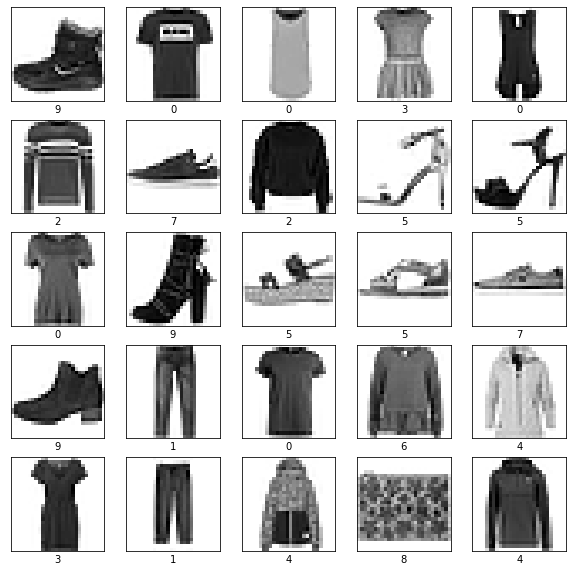

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Create and train model

In [12]:
model = keras.models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])
model.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
model.fit(train_images, train_labels, 
        epochs=10,
        callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6353 - accuracy: 0.7810
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3850 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

# Test accuracy

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3415 - accuracy: 0.8822

Test accuracy: 0.8822000026702881


## Make predictions
The model's linear outputs, logits. Attach a softmax layer to convert the logits to probalities, which are easy to interpret

In [7]:
probability_model = keras.models.Sequential([model,
                                    keras.layers.Softmax()])
predictions = probability_model.predict(test_images)  
print(predictions[0])
np.argmax(predictions[0])

[8.39703347e-08 1.02798894e-10 7.83173419e-08 1.01114694e-09
 1.48620575e-06 3.86639673e-04 5.37659503e-07 1.11572267e-02
 2.31475585e-08 9.88453925e-01]


9